In [45]:
pip install nltk squarify

  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
# https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import squarify

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
from nltk.stem import PorterStemmer

In [8]:
word_stemmer = PorterStemmer()

In [7]:
word_stemmer.stem('writing')

'write'

In [8]:
word_stemmer.stem('eating')

'eat'

In [9]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [3]:
import praw

reddit = praw.Reddit(client_id='SpMmWlA9VNMbn-8fbkm2bA',
                     client_secret='Bqi7WpVLw0qNimGAuVkXofKn1QuQ1g',
                     user_agent='owenAPI')

In [9]:
headlines = set()

In [10]:
for submission in reddit.subreddit('wallstreetbets').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

913


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Daily Discussion Thread for July 14, 2023',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': '$SAVE $35 Call Potential?', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.7579,
  'headline': 'World’s Empty Office Buildings Have Become a Debt Time Bomb',
  'neg': 0.556,
  'neu': 0.444,
  'pos': 0.0}]


In [12]:
df = pd.DataFrame.from_records(results)
df.head(20)

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,"Daily Discussion Thread for July 14, 2023"
1,0.000,1.000,0.000,0.0000,$SAVE $35 Call Potential?
2,0.556,0.444,0.000,-0.7579,World’s Empty Office Buildings Have Become a D...
3,0.000,1.000,0.000,0.0000,Most Anticipated Earnings Releases for the wee...
4,0.000,1.000,0.000,0.0000,GOOGL: Breakout
5,0.000,1.000,0.000,0.0000,Tesla charging technology put on fast track to...
6,0.000,0.714,0.286,0.3400,BABA chart giving me that middle finger
7,0.000,1.000,0.000,0.0000,Did I do Call Options right?
8,0.000,0.815,0.185,0.5267,The world’s 500 richest people added $852bn to...
9,0.092,0.704,0.204,0.4939,$W Wayfair: significantly over-valued price an...


In [13]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.0,0.0000,"Daily Discussion Thread for July 14, 2023",0
1,0.000,1.000,0.0,0.0000,$SAVE $35 Call Potential?,0
2,0.556,0.444,0.0,-0.7579,World’s Empty Office Buildings Have Become a D...,-1
3,0.000,1.000,0.0,0.0000,Most Anticipated Earnings Releases for the wee...,0
4,0.000,1.000,0.0,0.0000,GOOGL: Breakout,0


In [45]:
df2 = df[['headline', 'label']]
# df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [14]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:10], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:10], width=200)

Positive headlines:

['BABA chart giving me that middle finger',
 'The world’s 500 richest people added $852bn to their fortunes in the first half of 2023.',
 '$W Wayfair: significantly over-valued price and ready to dump to 30 (or feel free to inverse me and watch to jump to 300).',
 'Weed stocks are oversold. Small YOLO',
 'Someone help.',
 'I gave you $SAVE. My next play is $PENN, and my hedge is $GOOGL.',
 'Someone Get This Guy the Nobel Prize in Economics',
 'Interest rates, inflation and yield curve inversion. Part I.',
 "How spread ask can be more than the spread's value?",
 'Vuzix Receives OEM Order from Client Enabling Imaging Technology Solutions for Government, Defense and Commercial Markets']

Negative headlines:

['World’s Empty Office Buildings Have Become a Debt Time Bomb',
 'Bank of America nurses $100bn paper loss after big bet in bond market',
 "Why Slower Inflation Won't Prompt the Fed to Lower Rates",
 'No seriously, what in the world is going on here?',
 'Investors

In [15]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    562
 1    231
-1    120
Name: label, dtype: int64
 0    61.555312
 1    25.301205
-1    13.143483
Name: label, dtype: float64


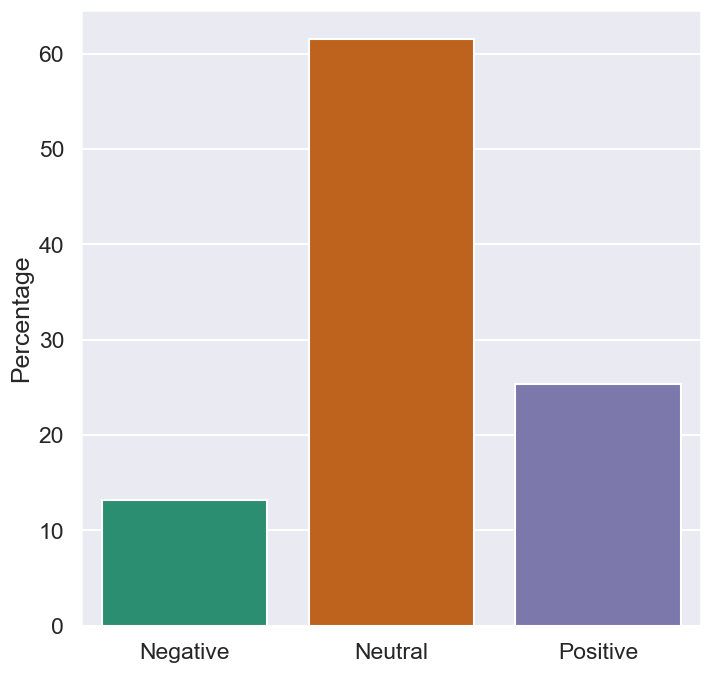

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [38]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [39]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [40]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [41]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [42]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('stock', 49),
 ('stocks', 34),
 ('shares', 30),
 ('good', 26),
 ('best', 23),
 ('time', 18),
 ('earnings', 18),
 ('market', 17),
 ('help', 17),
 ('crypto', 17),
 ('3', 16),
 ('growth', 15),
 ('free', 14),
 ('ai', 13),
 ('interest', 12),
 ('tesla', 12),
 ('like', 12),
 ('new', 11),
 ('value', 11),
 ('5', 11)]

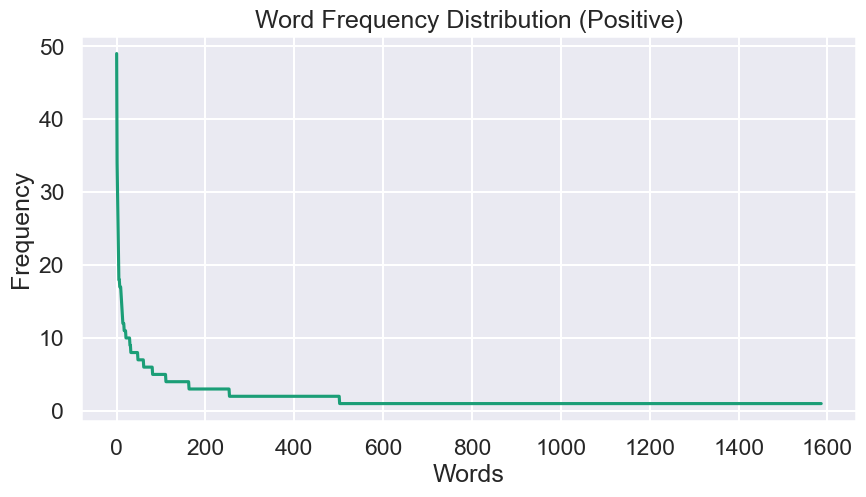

In [43]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

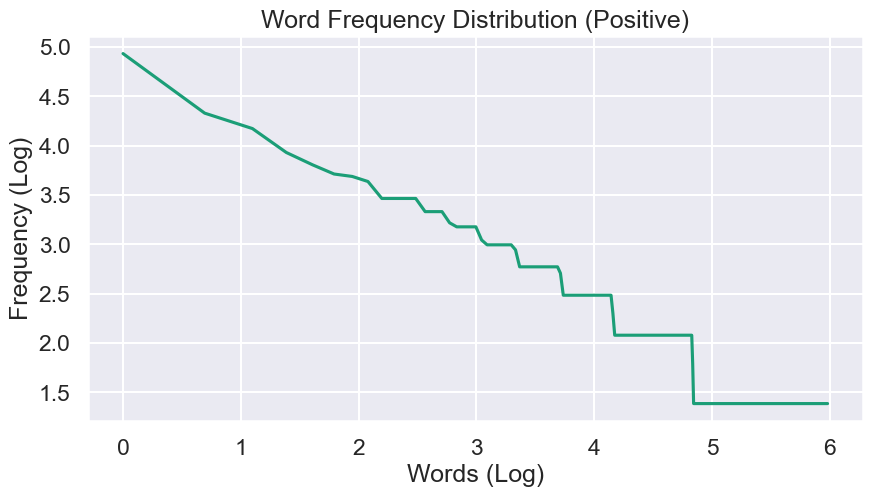

In [44]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [51]:
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('stocks', 17),
 ('stock', 14),
 ('recession', 11),
 ('us', 10),
 ('price', 8),
 ('market', 7),
 ('deal', 7),
 ('one', 6),
 ('earnings', 6),
 ('war', 6),
 ('short', 6),
 ('loss', 6),
 ('big', 6),
 ('debt', 6),
 ('gme', 5),
 ('still', 5),
 ('drop', 5),
 ('hold', 5),
 ('sell', 5),
 ('low', 5)]

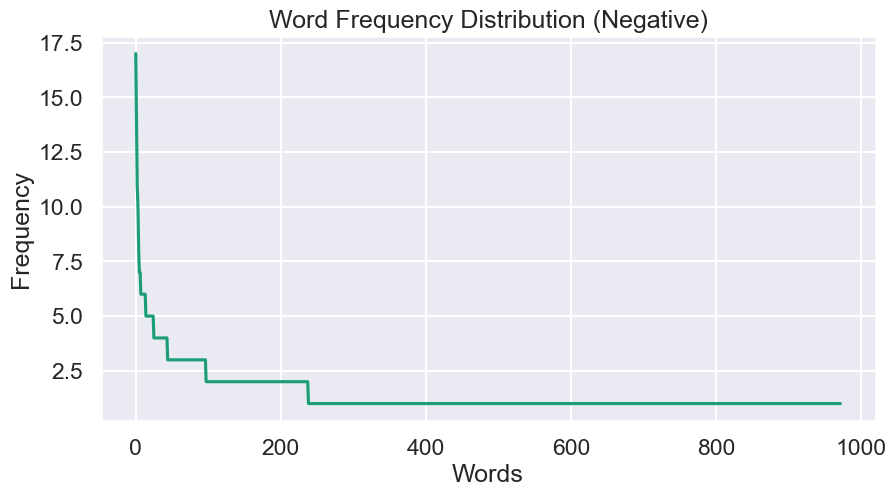

In [52]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

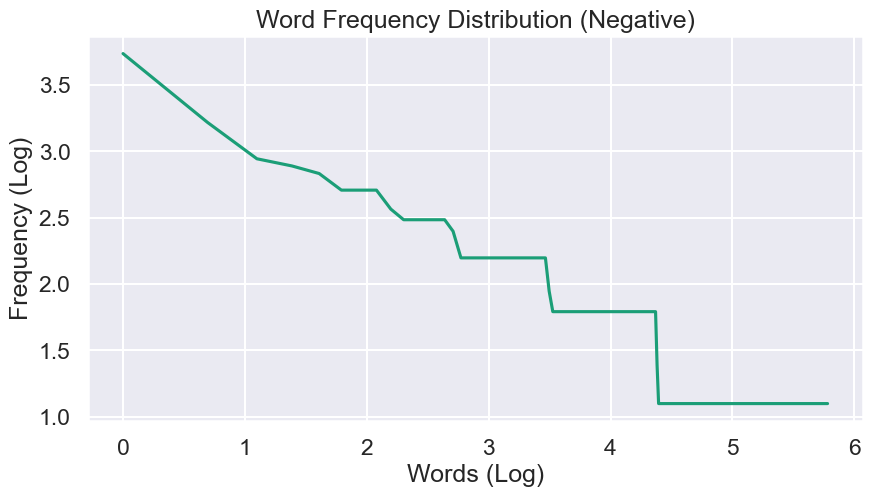

In [53]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [18]:
# https://medium.com/nerd-for-tech/wallstreetbets-sentiment-analysis-on-stock-prices-using-natural-language-processing-ed1e9e109a37
#  Import Libraries
import pandas as pd
import praw
import time
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import date
import io
import requests as r

tickers_dict = {'AMZN': 5, 'TSLA': 1, 'GOOG': 3, 'META': 3, 'KO': 10, 'PEP': 5,  # amazon, tesla, google, meta, coke, pepsi
                'BA': 5, 'XOM': 5, 'CVX': 4, 'UNH': 1, 'JNJ': 3, 'JPM': 3, # boeing, exxon mobil, chevron, united health, johnson&johnson, jp morgan
                'BAC': 5, 'C': 5, 'SPG': 10, 'AAPL': 6, 'MSFT': 5, 'WMT': 6, # bank of america, citigroup, simon property group, apple, microsoft, walmart
                'LMT': 2, 'PFE': 10, 'MMM': 3, 'CRWD': 3, 'WBD': 20, 'DIS': 8, # lockheed martin, pfizer, 3M, crowdstrike, warner bros, disney
                'AIG': 5, 'BRK-B': 4, 'DDOG': 3, 'SLB': 16, 'SONY': 5, 'PLD': 5, # american international group, berkshire hathaway, datadog, schlumberger, sony, prologis
                'INT': 16, 'AMD': 5, 'ISRG': 3, 'INTC': 5} # world fuel services, advanced micro devices, intuitive surgical, intel

data_link = 'https://www.dropbox.com/s/6kh2u0qotscww5n/component.csv?raw=1'

response = r.get(data_link)
content = io.StringIO(response.text)
data = pd.read_csv(content)

stocks_df = data['Symbol']

stocks = stocks_df.to_dict().values()

# Set program parameters
subs = ['wallstreetbets', 'stocks', 'investing', 'stockmarket']     # sub-reddit to search
post_flairs = {'Daily Discussion', 'Weekend Discussion', 'Discussion'}    # posts flairs to search || None flair is automatically considered
goodAuth = {'AutoModerator'}   # authors whom comments are allowed more than once
uniqueCmt = True                # allow one comment per author per symbol
ignoreAuthP = {'example'}       # authors to ignore for posts 
ignoreAuthC = {'example'}       # authors to ignore for comment 
upvoteRatio = 0.70         # upvote ratio for post to be considered, 0.70 = 70%
ups = 20       # define # of upvotes, post is considered if upvotes exceed this #
limit = 10      # define the limit, comments 'replace more' limit
upvotes = 2     # define # of upvotes, comment is considered if upvotes exceed this #
picks = 30     # define # of picks here, prints as "Top ## picks are:"
picks_ayz = 30   # define # of picks for sentiment analysis

posts, count, c_analyzed, tickers, titles, a_comments = 0, 0, 0, {}, [], {}
cmt_auth = {}

stocks

dict_values(['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK-B', 'C', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SCHW', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM'])

In [19]:
# Includes common words and words used on wsb that are also stock names
blacklist = {'I', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD', 'IT', 'OPEN', 'ATH', 'PM', 'IRS', 'FOR','DEC', 'BE', 'IMO', 'ALL', 'RH', 'EV', 'TOS', 'CFO', 'CTO', 'DD', 'BTFD', 'WSB', 'OK', 'PDT', 'RH', 'KYS', 'FD', 'TYS', 'US', 'USA', 'IT', 'ATH', 'RIP', 'BMW', 'GDP', 'OTM', 'ATM', 'ITM', 'IMO', 'LOL', 'AM', 'BE', 'PR', 'PRAY', 'PT', 'FBI', 'SEC', 'GOD', 'NOT', 'POS', 'FOMO', 'TL;DR', 'EDIT', 'STILL', 'WTF', 'RAW', 'PM', 'LMAO', 'LMFAO', 'ROFL', 'EZ', 'RED', 'BEZOS', 'TICK', 'IS', 'PM', 'LPT', 'GOAT', 'FL', 'CA', 'IL', 'MACD', 'HQ', 'OP', 'PS', 'AH', 'TL', 'JAN', 'FEB', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'FDA', 'IV', 'ER', 'IPO', 'MILF', 'BUT', 'SSN', 'FIFA', 'USD', 'CPU', 'AT', 'GG', 'Mar'}

# Adding wsb/reddit flavor to vader to improve sentiment analysis, score: 4.0 to -4.0
new_words = {
    'citron': -4.0,  
    'hidenburg': -4.0,        
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,     
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,     
     'maintain': 1.0,          
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,  
     'crack': 2.5,}

start_time = time.time()
for sub in subs:
    subreddit = reddit.subreddit(sub)
    hot_python = subreddit.hot() # sorting posts by hot
    # Extracting comments, symbols from subreddit
    for submission in hot_python:
        flair = submission.link_flair_text

         # Check if the author exists
        if submission.author is not None:
            author = submission.author.name
        else:
            author = "Unknown"  # Or any other value or action based on your needs

        # Checking: post upvote ratio # of upvotes, post flair, and author
        if submission.upvote_ratio >= upvoteRatio and submission.ups > ups and (flair in post_flairs or flair is None) and author not in ignoreAuthP:
            submission.comment_sort = 'new'
            comments = submission.comments
            titles.append(submission.title)
            posts += 1
            submission.comments.replace_more(limit = limit)
            for comment in comments:
                # try except for deleted account?
                try:
                    auth = comment.author.name
                except:
                    pass
                c_analyzed += 1

                # checking: comment upvotes and author
                if comment.score > upvotes and auth not in ignoreAuthC:
                    split = comment.body.split(' ')
                    for word in split:
                        word = word.replace("$", "")
                        # upper = ticker, length of ticker <= 5, excluded words
                        if word.isupper() and len(word) <= 5 and word not in blacklist and word in stocks:
                            
                            # unique comments, try/except for key errors
                            if uniqueCmt and auth not in goodAuth:
                                try:
                                    if auth in cmt_auth[word]:
                                        break
                                except:
                                    pass
                            
                            # counting tickers
                            if word in tickers:
                                tickers[word] += 1
                                a_comments[word].append(comment.body)
                                cmt_auth[word].append(auth)
                                count += 1
                            else:
                                tickers[word] = 1
                                cmt_auth[word] = [auth]
                                a_comments[word] = [comment.body]
                                count += 1

# sorts the dictionary
symbols = dict(sorted(tickers.items(), key=lambda item: item[1], reverse = True))
top_picks = list(symbols.keys())[0:picks]
time = (time.time() - start_time)

# print top picks
print("It took {t:.2f} seconds to analyze {c} comments in {p} posts in {s} subreddits.\n".format(t=time,
                                                                                                c=c_analyzed,
                                                                                                p=posts,
                                                                                                s=len(subs)))
print("Posts analyzed saved in titles")
# for i in titles: print(i) # prints the title of the posts analyzed

print(f"\n{picks} most mentioned picks: {top_picks}")



It took 70.90 seconds to analyze 4829 comments in 47 posts in 4 subreddits.

Posts analyzed saved in titles

30 most mentioned picks: ['NVDA', 'TSLA', 'V', 'UPS', 'AAPL', 'META', 'JPM', 'AMD', 'MSFT', 'AMZN', 'UNH', 'PYPL', 'GOOGL', 'NFLX', 'MO', 'CRM', 'DIS', 'QCOM', 'CVS', 'PEP', 'T', 'C', 'BAC', 'WMT', 'DOW']


In [20]:
times = []
top = []
for i in top_picks:
    print(f"{i}: {symbols[i]}")
    times.append(symbols[i])
    top.append(f"{i}: {symbols[i]}")

# Applying sentiment analysis
scores, s = {}, {}

vader = SentimentIntensityAnalyzer()
# adding custom words from data.py
vader.lexicon.update(new_words)

picks_sentiment = list(symbols.keys())[0: picks_ayz]
for symbol in picks_sentiment:
    stock_comments = a_comments[symbol]
    for cmnt in stock_comments:
        score = vader.polarity_scores(cmnt)
        if symbol in s:
            s[symbol][cmnt] = score
        else:
            s[symbol] = {cmnt: score}
        if symbol in scores:
            for key, _ in score.items():
                scores[symbol][key] += score[key]
        else:
            scores[symbol] = score

    # calculating averages
    for key in score:
        scores[symbol][key] = scores[symbol][key] / symbols[symbol]
        scores[symbol][key] = "{pol:.3f}".format(pol=scores[symbol][key])

# Printing sentiment analysis
print(f"\nSentiment analysis of top {picks_ayz} picks:")
df = pd.DataFrame(scores)
df.index = ['Bearish', 'Neutral', 'Bullish', 'Total_Compound']
df = df.T
print(df)


NVDA: 96
TSLA: 18
V: 13
UPS: 11
AAPL: 9
META: 8
JPM: 7
AMD: 4
MSFT: 4
AMZN: 3
UNH: 2
PYPL: 2
GOOGL: 2
NFLX: 1
MO: 1
CRM: 1
DIS: 1
QCOM: 1
CVS: 1
PEP: 1
T: 1
C: 1
BAC: 1
WMT: 1
DOW: 1

Sentiment analysis of top 30 picks:
      Bearish Neutral Bullish Total_Compound
NVDA    0.101   0.738   0.160          0.113
TSLA    0.104   0.780   0.117          0.012
V       0.213   0.597   0.036         -0.224
UPS     0.146   0.725   0.129          0.131
AAPL    0.075   0.799   0.126          0.151
META    0.029   0.932   0.038          0.146
JPM     0.031   0.613   0.356          0.319
AMD     0.069   0.794   0.137         -0.172
MSFT    0.029   0.725   0.246          0.622
AMZN    0.039   0.823   0.138          0.567
UNH     0.035   0.893   0.072          0.448
PYPL    0.086   0.746   0.168         -0.036
GOOGL   0.037   0.561   0.402          0.628
NFLX    0.000   1.000   0.000          0.000
MO      0.000   0.673   0.327          0.346
CRM     0.074   0.783   0.143          0.888
DIS     0.092  

In [24]:
pd.DataFrame(df)

,Bearish,Neutral,Bullish,Total_Compound
NVDA,0.101,0.738,0.160,0.113
TSLA,0.104,0.780,0.117,0.012
V,0.213,0.597,0.036,-0.224
UPS,0.146,0.725,0.129,0.131
AAPL,0.075,0.799,0.126,0.151
META,0.029,0.932,0.038,0.146
JPM,0.031,0.613,0.356,0.319
AMD,0.069,0.794,0.137,-0.172
MSFT,0.029,0.725,0.246,0.622
AMZN,0.039,0.823,0.138,0.567


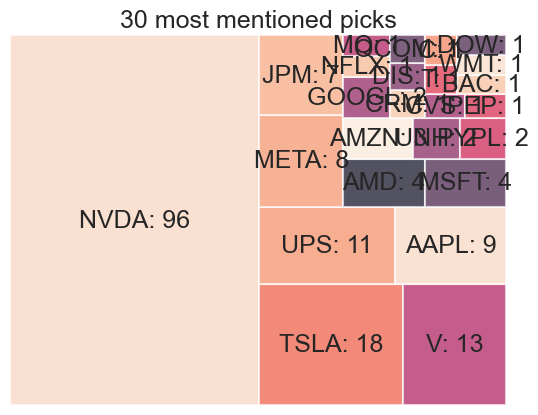

In [21]:
# Data Visualization
# Most mentioned picks
squarify.plot(sizes=times, label=top, alpha=0.7)
plt.axis('off')
plt.title(f"{picks} most mentioned picks")
plt.show()

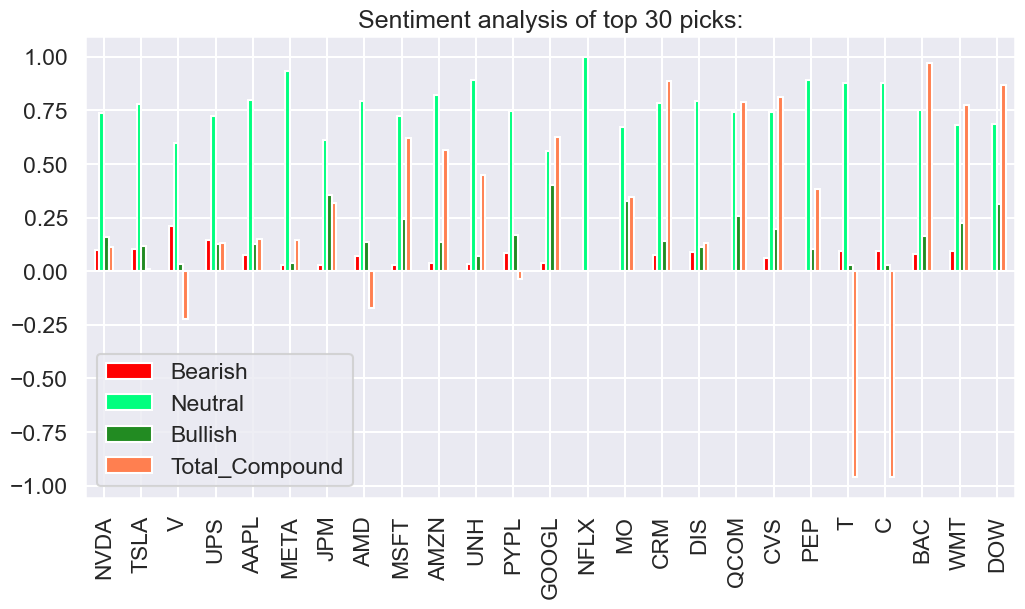

In [22]:
# Sentiment analysis

df = df.astype(float)
colors = ['red', 'springgreen', 'forestgreen', 'coral']
df.plot(kind='bar', color=colors, figsize=(12,6), title=f"Sentiment analysis of top {picks_ayz} picks:")

plt.show()